<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/TIme_seriese_KalmanFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simdkalman

In [ ]:
import simdkalman
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

kf = simdkalman.KalmanFilter(
    state_transition = np.array([[1,1],[0,1]]),
    process_noise = np.diag([0.1, 0.01]),
    observation_model = np.array([[1,0]]),
    observation_noise = 1.0)

# # simulate 100 random walk time series
# rand = lambda: random.normal(size=(100, 200))
# data = np.cumsum(np.cumsum(rand()*0.02, axis=1) + rand(), axis=1) + rand()*3

# # introduce 10% of NaNs denoting missing values
# data[random.uniform(size=data.shape) < 0.1] = np.nan

# # fit noise parameters to data with the EM algorithm (optional)
# kf = kf.em(data, n_iter=10)

# # smooth and explain existing data
# smoothed = kf.smooth(data)
# # predict new data
# pred = kf.predict(data, 15)
# # could be also written as
# # r = kf.compute(data, 15); smoothed = r.smoothed; pred = r.predicted

# import matplotlib.pyplot as plt

# # show the first 3 smoothed time series
# for i in range(3):

#     _, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
#     plt.title("time series %d" % (i+1))

#     x = np.arange(0, data.shape[1])

#     ax1.plot(x, data[i,:], 'b.', label="data")

#     smoothed_obs = smoothed.observations.mean[i,:]
#     obs_stdev = np.sqrt(smoothed.observations.cov[i,:])
#     ax1.plot(x, smoothed_obs, 'r-', label="smoothed")
#     ax1.plot(x, smoothed_obs - obs_stdev, 'k--', label="67% confidence")
#     ax1.plot(x, smoothed_obs + obs_stdev, 'k--')

#     x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
#     y_pred = pred.observations.mean[i,:]
#     pred_stdev = np.sqrt(pred.observations.cov[i,:])
#     ax1.plot(x_pred, y_pred, 'b-', label="predicted")
#     ax1.plot(x_pred, y_pred + pred_stdev, 'k--')
#     ax1.plot(x_pred, y_pred - pred_stdev, 'k--')
#     ax1.legend()

#     trend = smoothed.states.mean[i,:,1]
#     trend_stdev = np.sqrt(smoothed.states.cov[i,:,1,1])
#     ax2.plot(x, trend, 'g-', label="trend")
#     ax2.plot(x, trend - trend_stdev, 'k--', label="67% confidence")
#     ax2.plot(x, trend + trend_stdev, 'k--')

#     trend_pred = pred.states.mean[i,:,1]
#     trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
#     ax2.plot(x_pred, trend_pred, 'b-', label='predicted')
#     ax2.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
#     ax2.plot(x_pred, trend_pred - trend_pred_stdev, 'k--')
#     ax2.legend()

#     plt.show()

In [ ]:
# simulate 100 random walk time series
rand = lambda: random.normal(size=(100, 200))
data = np.cumsum(np.cumsum(rand()*0.02, axis=1) + rand(), axis=1) + rand()*3

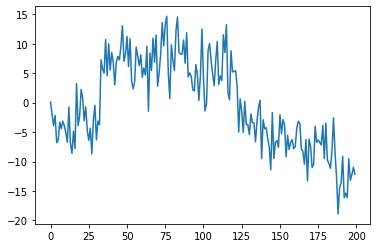

In [ ]:
plt.plot(data[0])

In [ ]:
# introduce 10% of NaNs denoting missing values
data[random.uniform(size=data.shape) < 0.1] = np.nan

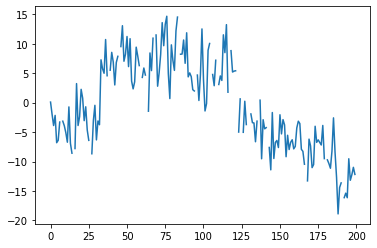

In [ ]:
plt.plot(data[0])

In [ ]:
# fit noise parameters to data with the EM algorithm (optional)
kf = kf.em(data, n_iter=10)

# smooth and explain existing data
smoothed = kf.smooth(data)
# predict new data
pred = kf.predict(data, 15)
# could be also written as
# r = kf.compute(data, 15); smoothed = r.smoothed; pred = r.predicted

In [ ]:
 smoothed.observations.mean # 스무싱 된 값
 smoothed.observations.cov # 스무싱 된 값의 오차범위 (표준편차)

array([[13.82727651, 13.22715178, 12.84063986, ..., 12.9680655 ,
        13.4281914 , 14.12905824],
       [12.84365608, 12.31285656, 11.9579634 , ..., 12.16710973,
        12.57524932, 13.18356048],
       [13.47496538, 12.90819987, 12.53019717, ..., 12.97446616,
        13.44858148, 14.14799562],
       ...,
       [14.71238924, 14.02171829, 13.46956704, ..., 13.31954734,
        13.79331377, 14.52998632],
       [13.89857479, 13.28971207, 12.89386601, ..., 13.64174439,
        14.36078395, 15.40893001],
       [13.93470256, 13.38913847, 13.02435972, ..., 15.30859218,
        16.17771174, 17.40475728]])

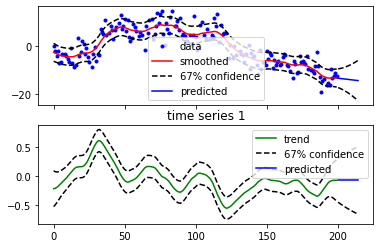

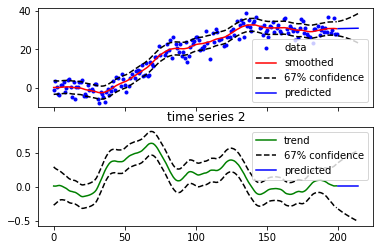

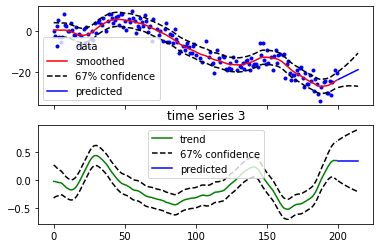

In [ ]:
for i in range(3):

    _, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    plt.title("time series %d" % (i+1))

    x = np.arange(0, data.shape[1])

    ax1.plot(x, data[i,:], 'b.', label="data")

    smoothed_obs = smoothed.observations.mean[i,:]
    obs_stdev = np.sqrt(smoothed.observations.cov[i,:])
    ax1.plot(x, smoothed_obs, 'r-', label="smoothed")
    ax1.plot(x, smoothed_obs - obs_stdev, 'k--', label="67% confidence")
    ax1.plot(x, smoothed_obs + obs_stdev, 'k--')

    x_pred = np.arange(data.shape[1], data.shape[1]+pred.observations.mean.shape[1])
    y_pred = pred.observations.mean[i,:]
    pred_stdev = np.sqrt(pred.observations.cov[i,:])
    ax1.plot(x_pred, y_pred, 'b-', label="predicted")
    ax1.plot(x_pred, y_pred + pred_stdev, 'k--')
    ax1.plot(x_pred, y_pred - pred_stdev, 'k--')
    ax1.legend()

    trend = smoothed.states.mean[i,:,1]
    trend_stdev = np.sqrt(smoothed.states.cov[i,:,1,1])
    ax2.plot(x, trend, 'g-', label="trend")
    ax2.plot(x, trend - trend_stdev, 'k--', label="67% confidence")
    ax2.plot(x, trend + trend_stdev, 'k--')

    trend_pred = pred.states.mean[i,:,1]
    trend_pred_stdev = np.sqrt(pred.states.cov[i,:,1,1])
    ax2.plot(x_pred, trend_pred, 'b-', label='predicted')
    ax2.plot(x_pred, trend_pred + trend_pred_stdev, 'k--')
    ax2.plot(x_pred, trend_pred - trend_pred_stdev, 'k--')
    ax2.legend()

    plt.show()